# Notes

DHC key metrics

- thermal load density
- load factor (average / peak load)
- diversity factor (central equipment design load / sum of peak load)

## *ASHRAE HVAC Application CHAPTER 34 GEOTHERMAL ENERGY*

The following classification by temperature is used in the geothermal industry:

- High temperature t > 150°C
- Intermediate temperature 90°C < t < 150°C
- Low temperature t < 90°C

> Electric generation is generally not economical for resources
with temperatures below about 150°C, which is the reason for the
division between high- and intermediate-temperature. However,
binary (organic Rankine cycle) power plants, with the proper set of
circumstances, have demonstrated that it is possible to generate
electricity economically above 110°C. In 1988, there were 86
binary plants worldwide, generating a total of 126.3 MW (Di Pippo
1988).

Hybrid systems are a variation of ground-coupled systems in
which a smaller ground loop is used, augmented in cooling mode by
a fluid cooler or a cooling tower. This approach can have merit in
large cooling-dominated applications. The ground loop is sized to
meet the heating requirements. The downsized loop is used in con-
junction with the fluid cooler or cooling tower with an isolation heat
exchanger to meet the heat rejection load. Using the cooler reduces
the capital cost of the ground loop in such applications, but some-
what increases maintenance requirements. For heavily heating-
dominant applications, a downsized loop also can be augmented with
an auxiliary heat source such as electric resistance, solar collectors,
or fossil fuel.

## *Analysis of the impact of storage conditions on the thermal recovery efficiency of low-temperature ATES systems*

> The energy demand profile of ATES systems varies due to variations
in weather conditions and building use which is of importance for the
actual value of the thermal efficiency. For 12 varying scenarios the
efficiencies are determined for both a weather dependent and the reg-
ular energy demand profile, showing that the efficiencies of the corre-
sponding conditions differ. However, they show the same relation ac-
cording to the changes in conditions; the Pearson correlation coefficient
of the two simulation result collections is 0,97. Based on this evaluation
all simulations are done with one basic energy demand profile

# Constants & conversion factors

In [64]:
# Select node for analysis
node = 'Biosciences'

In [65]:
# Constants
# Careful: Absorption chiller efficiency is homogeneous to a COP (heat flow rate/power) whereas electric chiller efficiency is in kW/ton so 1/EER!!!
file_path = '/home/agautier/Downloads/2019-05-31 Building energy and loads.xlsx'
sheet_name = 'Inputs'
df = pd.read_excel(file_path, sheet_name, skiprows=11, nrows=11)
df = df[[x for x in df.columns if 'Unnamed' not in x]]
df.rename(lambda x: re.sub(' ', '', x), axis='columns', inplace=True)
cst = df.copy()
cst = pd.concat([
    cst,
    pd.DataFrame(dict(
        Parameter=['J/Btu', 'kW/ton', 'kW/(kBtu/h)', 'J/kWh', 'm2/sqft'],
        Value=[1055.06, 3.51685, 1000 / 3600 * 1055.06 / 1000, 3.6e+6, 0.092903]))
])
cst.set_index('Parameter', inplace=True)
cst

/home/agautier/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Conditional Formatting extension is not supported and will be removed



,Value,Unit,Source
Parameter,,,
Existing building-level steam loss,1.500000e-01,%,Assumption to convert from steam usage to heat...
Enthalpy,9.700000e+02,Btu/lb,NaN
Btu/kBtu,1.000000e+03,Btu/kBtu,Constant
Gas efficiency,8.000000e-01,%,Assumption
Btu per W,3.412000e+00,Btu/W,Constant
Btu per therm,1.000000e+05,Btu/therm,Constant
Absorption chiller efficiency,4.000000e-01,COP,Assumption based on average chiller age and di...
Existing electric chiller efficiency,1.250000e+00,kW/ton,Assumption based on average chiller age and di...
New electric chiller efficiency,5.000000e-01,kW/ton,Assumption based on average chiller age and di...


# Loads and energy use

In [66]:
# Peak loads
file_path = '/home/agautier/Downloads/2019-05-31 Building energy and loads.xlsx'
sheet_name = 'Peak Load Calc'
df = pd.read_excel(file_path, sheet_name, skiprows=12)
missing_names = ['CAAN','Building Name','Building Type','Year Constructed',	'Year Demolished',	
                 'Building Area (sqft)', 'Node', 'Cluster']
df.columns.values[1:9] = missing_names
df.columns.values[9] = 'Cooling Type'
df.columns.values[11] = 'Peak Steam Intensity (Btuh/sqft)'
df = df[[x for x in df.columns if 'Unnamed' not in x]]
df.rename(lambda x: re.sub(' ', '', x), axis='columns', inplace=True)
df = df[~df.BuildingType.isna()]
loa = df.copy()
# SI conversion (kW)
loa['PeakHeating'] = loa['PeakHeating'] * cst.at['kW/(kBtu/h)', 'Value']
loa['PeakCooling'] = loa['TotalChillerCapacity'] * cst.at['kW/ton', 'Value']
loa.tail()

/home/agautier/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Conditional Formatting extension is not supported and will be removed

/home/agautier/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Data Validation extension is not supported and will be removed



,CAAN,BuildingName,BuildingType,YearConstructed,YearDemolished,BuildingArea(sqft),Node,Cluster,CoolingType,PeakSteamIntensity(Btuh/sqft),...,Process.3,SpaceHeating.1,DHW.4,Absorption.4,Process.4,SpaceHeating.2,DHW.5,Absorption.5,Process.5,PeakCooling
114,1800,Lawrence Hall of Science,Classroom,1968.0,NaN,128540.0,NaN,NaN,"Packaged VAV, DX",10.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452.055899
115,1286,Tang Center,Admin,1993.0,NaN,75228.0,NaN,NaN,"Packaged VAV, DX",10.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.565592
116,1033,Chou Hall,Classroom,2018.0,NaN,80000.0,NaN,NaN,"Packaged VAV, DX",10.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.348000
117,1787,Upper Hearst,Residence,2021.0,NaN,54000.0,NaN,NaN,"Packaged VAV, DX",14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.936930
118,1520,Bakar Bioenginuity,Bioscience,1970.0,NaN,102794.0,NaN,NaN,"Packaged VAV, DX",41.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903.777697


In [4]:
# Energy use
file_path = '/home/agautier/Downloads/2019-05-31 Building energy and loads.xlsx'
sheet_name = 'Annual Energy Calc'
df = pd.read_excel(file_path, sheet_name, skiprows=12)
missing_names = ['CAAN','Building Name','Building Type','Year Constructed',	'Year Demolished',	
                 'Building Area (sqft)', 'Node', 'Cluster']
df.columns.values[1:9] = missing_names
df.columns.values[10] = 'Electricity Use (kWh/y)'
df.columns.values[16] = 'Steam Use (kBtu/y)'
df = df[[x for x in df.columns if 'Unnamed' not in x]]
df.rename(lambda x: re.sub(' ', '', x), axis='columns', inplace=True)
df = df[~df.BuildingType.isna()]
eus = df.copy()

# Add distributed energy in kWh/y
eus['COP'] = 1 / (eus.apply(lambda x: loa.set_index('BuildingName').at[x.BuildingName, 'Efficiency(kW/ton)'], axis=1) / cst.at['kW/ton', 'Value'])
## Assumptions: Cooling = Cooling&HeatRejection and COP (kW/kW) = seasonal COP (kWh/kWh)
eus['CoolingElec'] = eus['ElectricityUse(kWh/y)'] * eus['Cooling&HeatRejection'] * eus['COP']
eus['SteamEnergy'] = eus['SteamUse(kBtu/y)'] * (1 - cst.at['Existing building-level steam loss', 'Value']) * 1000 *\
                     cst.loc['J/Btu'].Value / cst.at['J/kWh', 'Value']
eus['SpaceHeating'] = eus['SteamEnergy'] * eus['SpaceHeating']
eus['DHW'] = eus['SteamEnergy'] * eus['DHW']
eus['Process'] = eus['SteamEnergy'] * eus['Process']
# Careful: Absorption chiller efficiency is homogeneous to a COP (heat output/heat input) 
eus['CoolingAbsorption'] = eus['SteamEnergy'] * eus['Absorption'] * cst.at['Absorption chiller efficiency', 'Value']
eus['Cooling'] = eus['CoolingElec'] + eus['CoolingAbsorption'] 

eus.tail()

/home/agautier/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Conditional Formatting extension is not supported and will be removed



,CAAN,BuildingName,BuildingType,YearConstructed,YearDemolished,BuildingArea(sqft),Node,Cluster,ElectricityUse(kWh/y),Cooling&HeatRejection,...,PlugsandMisc..2,SpaceHeating.2,DHW.2,Absorption.2,Process.2,COP,CoolingElec,SteamEnergy,CoolingAbsorption,Cooling
96,1292 (N),Lewis Hall (N),Chemistry,2040.0,NaN,87500.0,"Engineering, Physics and Chemistry",Engineering Lewis,4179700.0,0.25,...,NaN,NaN,NaN,NaN,NaN,2.842787,2.970499e+06,1.829879e+06,0.0,2.970499e+06
97,CAAN?,Lewis Hall Addition,Chemistry,2028.0,NaN,90000.0,"Engineering, Physics and Chemistry",Engineering Lewis,4299120.0,0.25,...,NaN,NaN,NaN,NaN,NaN,2.842787,3.055371e+06,1.882161e+06,0.0,3.055371e+06
98,1785,Oxford Tract,Residence,2025.0,NaN,1050000.0,Biosciences,Oxford Tract,11106060.0,0.00,...,NaN,NaN,NaN,NaN,NaN,6.011709,0.000000e+00,3.609624e+06,0.0,0.000000e+00
99,1601,Peoples Park,Residence,2023.0,NaN,432000.0,Lower Sproul offices,Peoples Park,4569350.4,0.00,...,NaN,NaN,NaN,NaN,NaN,6.011709,0.000000e+00,1.485102e+06,0.0,0.000000e+00
100,1774 (N),Tolman Hall (N) (Climate Science Building),Bioscience,2025.0,NaN,292500.0,Biosciences,Biosciences North,13972140.0,0.25,...,NaN,NaN,NaN,NaN,NaN,6.011709,2.099911e+07,6.117024e+06,0.0,2.099911e+07


In [63]:
# Load factors - Node
LF_cooling = eus.set_index('Node').loc[node, 'Cooling'].sum() / 8760 / loa.set_index('Node').loc[node, 'PeakCooling'].sum()
LF_heating = (eus.set_index('Node').loc[node, 'SpaceHeating'] + eus.set_index('Node').loc[node, 'DHW']).sum() / 8760 /\
             loa.set_index('Node').loc[node, 'PeakHeating'].sum()
LF_cooling, LF_heating

(0.38916928920594046, 0.6038473822478909)

In [6]:
load_diversity = dict(
    heating_node=0.85,
    heating_campus=0.80,
    cooling_node=0.95,
    cooling_campus=0.90,
)

In [61]:
# Peak loads - Campus
loa['PeakHeating'].sum() * load_diversity['heating_campus'], loa['PeakCooling'].sum() * load_diversity['cooling_campus']  # kw

(67303.10263876154, 89011.676633256)

In [32]:
# Capacity weighted chiller efficiency COP (-)
## Whole campus
COP_campus = 1 / (
        (loa['Efficiency(kW/ton)'] * loa['TotalChillerCapacity']).sum() /\
        loa['TotalChillerCapacity'].sum() / cst.at['kW/ton', 'Value'])
## Node
COP_node = 1 / (
(loa.set_index('Node').loc[node, 'Efficiency(kW/ton)'] *\
 loa.set_index('Node').loc[node, 'TotalChillerCapacity']).sum() /\
    loa.set_index('Node').loc[node, 'TotalChillerCapacity'].sum() / cst.at['kW/ton', 'Value'])

print(COP_campus, COP_node)

4.3497463340703 4.762747927832286


## Hourly load profile

In [36]:
peak_cooling = loa.set_index('Node').loc[node, 'PeakCooling'].sum() * load_diversity['cooling_node']  # kW
peak_heating = loa.set_index('Node').loc[node, 'PeakHeating'].sum() * load_diversity['heating_node']  # kW

In [79]:
file_path = '/home/agautier/Downloads/2020-09-23 UCB load data to DOE.xlsx'
sheet_name = 'Hourly load profiles'
df = pd.read_excel(file_path, sheet_name, skiprows=11)
df.rename(lambda x: re.sub(' ', '', x), axis='columns', inplace=True)
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
# SI conversion: kBtu/h to kW
df.loc[:, ['Cooling', 'Heating']] *= cst.loc['kW/(kBtu/h)'].Value
# df = df[['Date', 'Cooling', 'Heating']].melt(id_vars='Date')
lot = df[['Cooling', 'Heating']].copy()
# Add month and hour of day and max heat flow rate from condenser heat recovery
lot['month'] = lot.index.month
lot['hour'] = lot.index.hour

# Scale (node-level) based on distributed energy / year
# Including DHW in heating, excluding process = same assumption as 'Peak Heating' in 'Peak Load Calc'
eus_cooling = eus.set_index('Node').loc[node, 'Cooling'].sum()
eus_heating = (eus.set_index('Node').loc[node, 'SpaceHeating'] + eus.set_index('Node').loc[node, 'DHW']).sum()
sca_cooling = eus_cooling / lot.Cooling.resample("60min").mean().sum() 
sca_heating = eus_heating / lot.Heating.resample("60min").mean().sum() 
lot.Cooling = lot.Cooling * sca_cooling
lot.Heating = lot.Heating * sca_heating

# # Scale peak load under the constraint of unchanged mean load 
# sct_cooling = (peak_cooling - lot.Cooling.mean()) / (lot.Cooling.max() - lot.Cooling.mean())
# sct_heating = (peak_heating - lot.Heating.mean()) / (lot.Heating.max() - lot.Heating.mean())
# lot.Cooling = lot.Cooling.mean() + (lot.Cooling - lot.Cooling.mean()) * sct_cooling
# lot.Heating = lot.Heating.mean() + (lot.Heating - lot.Heating.mean()) * sct_heating

# Add month and hour of day and max heat flow rate from condenser heat recovery
lot['MaxHeatRecovery'] = lot.Cooling * (1 + 1 / COP_node)
lot['MaxHeatRecovery'] = lot[['MaxHeatRecovery', 'Heating']].min(axis=1)

print(sca_cooling, sca_heating)
lot.tail()

0.3938186189864749 0.3671768610171129


,Cooling,Heating,month,hour,MaxHeatRecovery
Date,,,,,
2018-12-31 18:59:59.998,2061.193534,11812.892961,12,18,2493.967548
2018-12-31 19:59:59.998,1918.363116,11815.517579,12,19,2321.148051
2018-12-31 20:59:59.998,1577.934923,11563.753629,12,20,1909.242594
2018-12-31 21:59:59.998,1407.764682,11981.578965,12,21,1703.342928
2018-12-31 22:59:59.998,1463.412618,10380.450040,12,22,1770.674862


In [75]:
# Check
peak_cooling / lot.loc[lot.Cooling==lot.Cooling.max(), 'Cooling'].values[0], eus_cooling / lot.Cooling.resample("60min").mean().sum() 

(0.2859282624289797, 0.9999999999999999)

In [69]:
# Check
peak_heating / lot.loc[lot.Heating==lot.Heating.max(), 'Heating'].values[0], eus_heating / lot.Heating.resample("60min").mean().sum() 

(0.46821110959199747, 1.0)

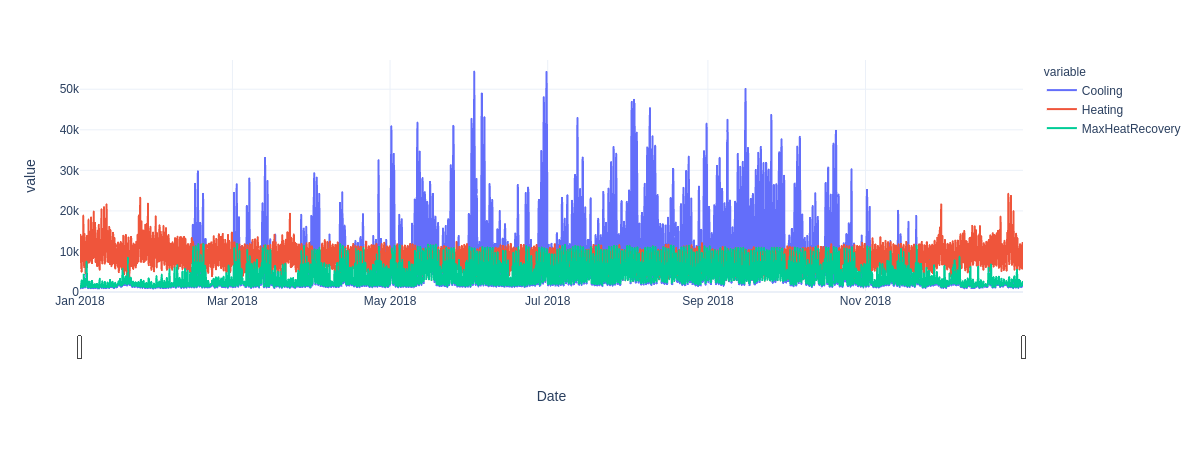

In [77]:
toplot = lot[['Cooling', 'Heating', 'MaxHeatRecovery']].melt(ignore_index=False)
fig = px.line(toplot, x=toplot.index, y='value', color='variable')
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
    ),
    yaxis=dict(rangemode='tozero')
)
fig

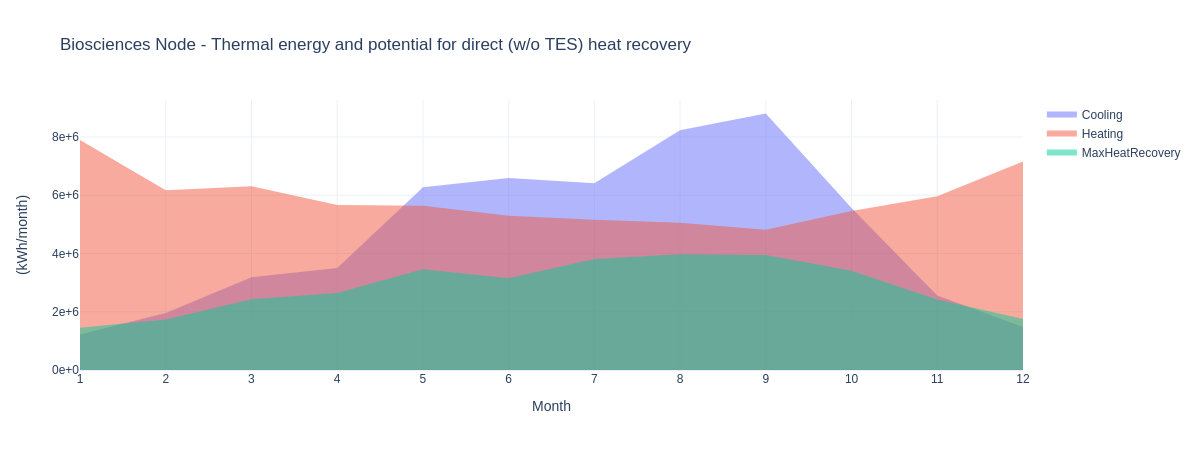

In [78]:
toplot = lot[['Cooling', 'Heating', 'MaxHeatRecovery']].resample("60min").mean()
toplot['month'] = toplot.index.month
toplot = toplot.groupby('month').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=toplot.index, y=toplot.Cooling, fill='tozeroy', name='Cooling', mode='none'))
fig.add_trace(go.Scatter(x=toplot.index, y=toplot.Heating, fill='tozeroy', name='Heating', mode='none'))
fig.add_trace(go.Scatter(x=toplot.index, y=toplot.MaxHeatRecovery, fill='tozeroy', name='MaxHeatRecovery', mode='none'))

fig.update_layout(title=f'{node} Node - Thermal energy and potential for direct (w/o TES) heat recovery')
fig.update_yaxes(title='(kWh/month)', tickformat="e")
fig.update_xaxes(title='Month', dtick=1)
fig

In [18]:
fig.write_image("fig.svg")

In [56]:
figs = []
for m in pd.unique(lot.month):
    toplot = lot.loc[lot.month==m]
    toplot = toplot.groupby('hour').mean()
    toplot = toplot[['Cooling', 'Heating', 'MaxHeatRecovery']].melt(ignore_index=False)
    fig = px.line(toplot, x=toplot.index + 1, y='value', color='variable', title=dt.date(2000, m, 1).strftime('%B'))
    fig.update_xaxes(title='Hour of the day', dtick=1)
    fig.update_yaxes(title='(kW)', rangemode='tozero')
    figs.append(fig)

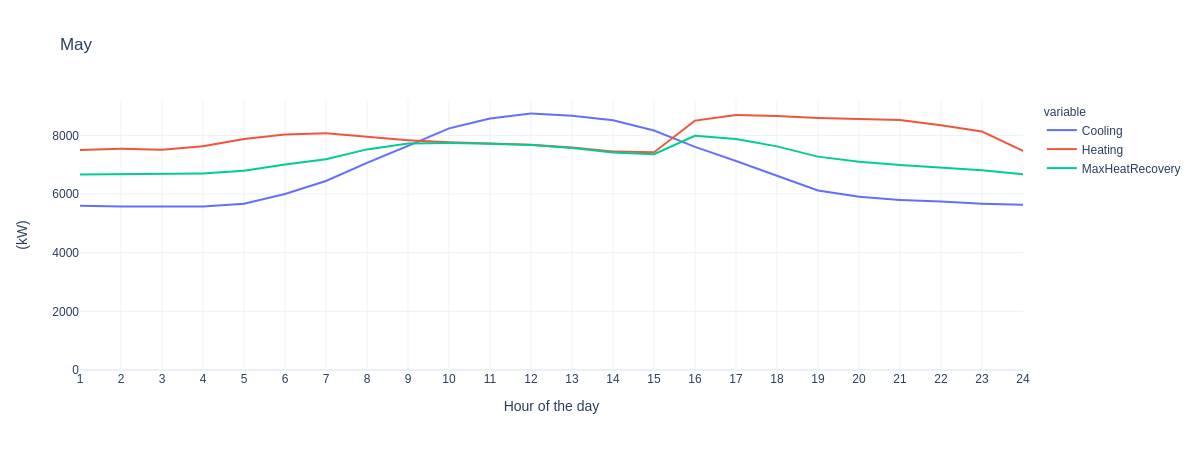

In [57]:
figs[4]

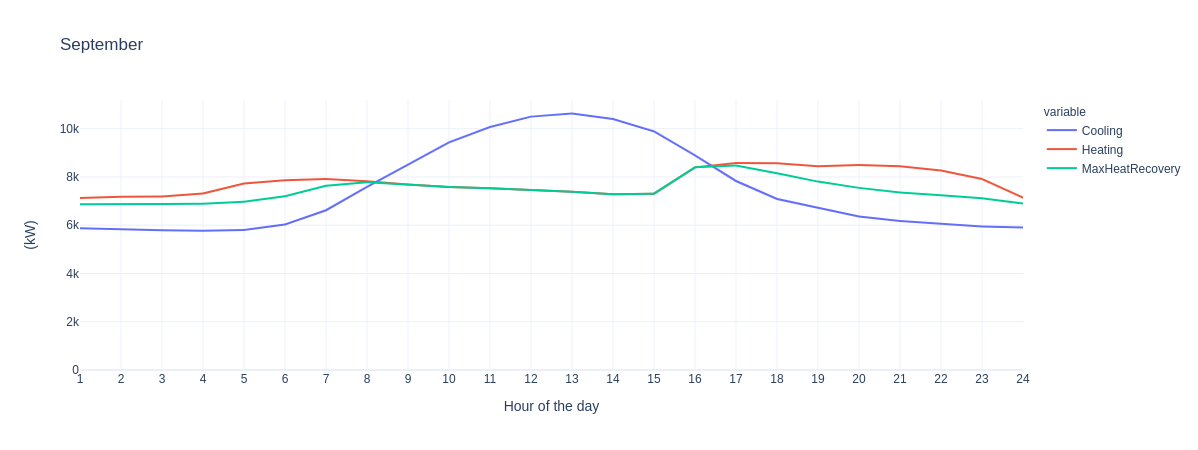

In [58]:
figs[8]

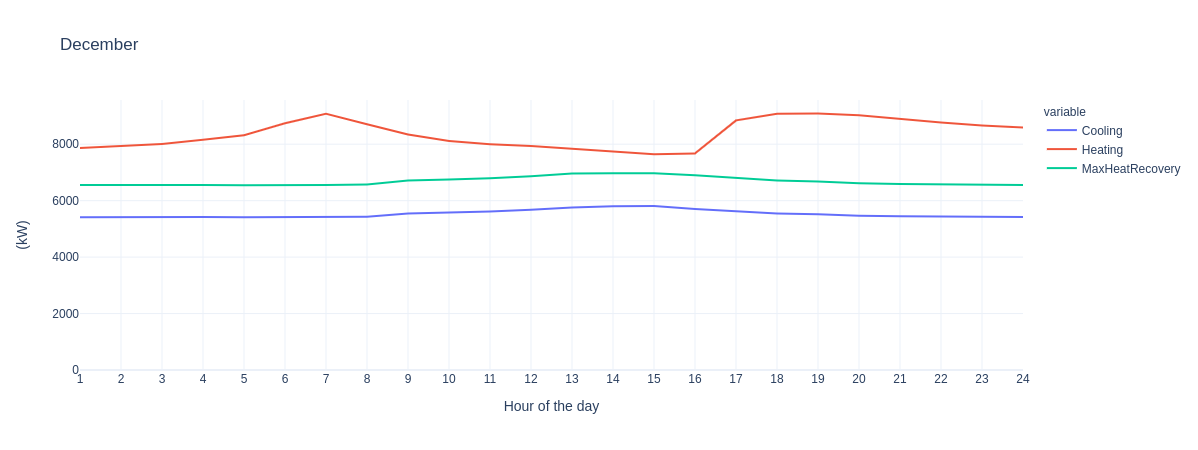

In [59]:
figs[11]

# GCHP Design 

> Equations (2) and (3) consider three different pulses of heat to
account for long-term heat imbalances q a , average monthly heat
rates during the design month, and maximum heat rates for a short-
term period during a design day. This period could be as short as 1 h,
but a 4 to 6 h block is recommended.

In [23]:
# Design months = 1 for heating, 9 for cooling
# Note that load time series scaled based on energy gives peak loads 4 times higher for cooling and 2 times higher for heating!
PLFm = lot.resample('1M').mean() 
Ql_4 = lot.resample('240min').mean()
PLFm.Heating = PLFm.Heating / Ql_4.Heating.max()
PLFm.Cooling = PLFm.Cooling / Ql_4.Cooling.max()
PLFm

,Cooling,Heating,month,hour,MaxHeatRecovery
Date,,,,,
2018-01-31,0.032627,0.542858,1.0,11.500000,1985.200072
2018-02-28,0.058218,0.469243,2.0,11.500000,2613.185545
2018-03-31,0.085523,0.433419,3.0,11.500000,3295.458874
2018-04-30,0.097322,0.402237,4.0,11.497920,3700.987135
2018-05-31,0.168432,0.387515,5.0,11.500000,4668.792532
2018-06-30,0.182916,0.375742,6.0,11.500000,4400.126754
2018-07-31,0.172211,0.354697,7.0,11.500000,5159.359092
2018-08-31,0.221215,0.347380,8.0,11.500000,5377.494017
2018-09-30,0.244439,0.341803,9.0,11.500000,5511.212249


In [26]:
tmp = loa.loc[loa.BuildingName.str.contains('Tolman'), ['PeakHeating', 'TotalChillerCapacity']]
peak_tolman_heating = tmp.PeakHeating.values[0] * cst.at['kW/(kBtu/h)', 'Value']
peak_tolman_cooling = tmp.TotalChillerCapacity.values[0] * cst.at['kW/ton', 'Value']
peak_tolman_heating, peak_tolman_cooling

(840.693061201908, 2571.6965625)

In [27]:
peak_heating, peak_cooling

(11340.473789644011, 15540.209935557998)

In [28]:
peak_tolman_cooling / peak_cooling

0.16548660366650694

In [29]:
eus.loc[loa.BuildingName.str.contains('Tolman'), ['SpaceHeating', 'DHW', 'Cooling']].applymap("{:.1e}".format)

,SpaceHeating,DHW,Cooling
100,3.4e+06,1.5e+06,2.1e+07


In [41]:
eus.set_index('Node').loc[node, ['SpaceHeating', 'DHW', 'Cooling']].sum().map("{:.1e}".format)  # kWh/y

SpaceHeating    5.0e+07
DHW             2.1e+07
Cooling         5.6e+07
dtype: object

In [31]:
# Building area: total gross floor area?
# ETHZ campus Hönggerberg = 360e3 m2 Energy reference area
# EU area = Sum of all above and below ground floor areas for the use of which heating or air conditioning is necessary
# with a total gross floor area of approximately 47,000 m2 (SIA 416) by 2018; experts estimate the associated energy reference area (EBF) to be around 15% smaller
eus.loc[eus.Node==node, 'BuildingArea(sqft)'].sum() * cst.at['m2/sqft', 'Value']

228533.390342